# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Ali Fakhar 
2.   Student Number: 400206335


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [7]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [9]:
dataset = pd.read_csv('/home/ali/Desktop/data/data01.csv')

# implement the split part
# name them: x_train, x_test, y_train, y_test
print(dataset.shape)
N = max(dataset.shape)
train = set()
sampleSize = np.round(0.8*N)
answerSize = 0
while answerSize < sampleSize:
    r = np.random.randint(0,N-1)
    if r not in train:
        answerSize += 1
        train.add(r)
train = list(train)
test = set()
for i in range(N):
    if i in train:
        pass
    else:
        test.add(i)   
dataset = np.array(dataset)
test = list(test)
x_train = dataset[[train],1]
y_train = dataset[[train],2]
x_test = dataset[[test],1]
y_test = dataset[[test],2]
# print(x_train.shape, y_train.shape, x_test.shape , y_test.shape)

(500, 3)


### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [10]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
A = np.concatenate((x_train.T,np.full((max(x_train.shape),1),1)),axis=1)
A.shape
# y_train.shape
m =  np.linalg.inv((A.T @A))@ A.T@ y_train.T 

In [11]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(y_train,predicted_train_y) #np.average(np.power((predicted_train_y-y_train),2))
test_error = mean_squared_error(y_test,predicted_test_y) #np.average(np.power((predicted_test_y-y_test),2))
print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.3273593655039823
MSE test error: 0.3447217198919249


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

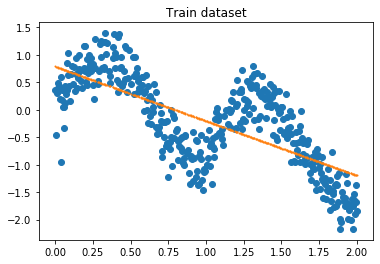

In [12]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

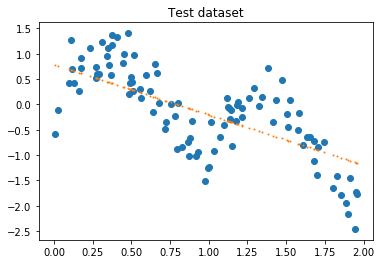

In [13]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

Whothout any doubt, this accuracy could not be acceptable. This problem is because of the positions of data and their relation. As you can see, they do not have linear relation with each other and we should change our model. It is obvoius that I have chosen test and train sats randomly, without choosing them randomly; generalization also could not be acceptable. Choosing polinomial with higher degree in order to affine functions could have better answer.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Yes, it should have better answer; we could model our dataset as a multi affine functions.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [14]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter=1):
    l = train_dataset.shape[0] #train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, temp in enumerate(train_dataset):
        train = temp.reshape((2,1))
        W[i, i] = np.exp(float(-((train-the_query_point).T@(train-the_query_point))/(2*hyperparameter**2)))     
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [15]:
def predict(train_X, train_Y, query_x, hyperparameter):
    l = train_X.shape[0] #train_dataset.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    lp = query_x.shape[0] #train_dataset.shape[0]  
    qx = np.mat([query_x, 1]).reshape((2,1))
    W = get_weight_matrix(qx, X, hyperparameter)    
    theta = (np.linalg.inv(X.T@W@X))@(X.T@W@train_Y)
    return np.dot(qx.T, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [16]:
x_train = (dataset[[train],1]).T
y_train = (dataset[[train],2]).T
x_test = (dataset[[test],1]).T
y_test = (dataset[[test],2]).T
hyperparameter = 0.01
predicted_test = np.array([predict(x_train, y_train, query, hyperparameter) for query in x_test])[:, 0, 0]
print(predicted_test.shape)
error = mean_squared_error(y_test,predicted_test) 
print(f"MSE test error: {error}")

(100,)
MSE test error: 0.10937328661674119


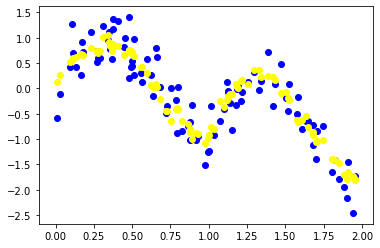

In [17]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes, with changing the model our result are much more better. Because it use position of other data and helps the new data to have better prediction. 

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

It could have great soloution; because it selects it's near neighbours and its neighbours help the data to have a great prediction.

### Part10:
Implementing the `KNN model`.

In [18]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = abs(x1-x2) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        dist = []
        dist = [self.distance(x,x1) for x1 in self.X]
        indices = np.argsort(np.array(dist)[:, 0])[:self.k] # find indices of k nearest neighbours to x
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(y_train[neareest_indices])
        return predicted_y

In [19]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(y_test,predicted_y) 
    return error, predicted_y

In [20]:
k = 7
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 0.11196640492232084


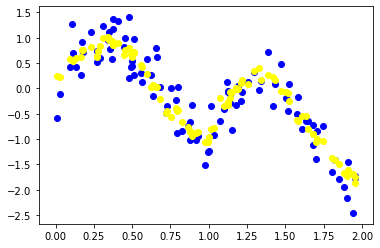

In [21]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

It seems that it is well, considering the other method which is locally weighted linear regression; both of them have a well performance with the 10% error. I have used cross-validation to estimate the best number for "k" and the answer among {3 ,5 ,7} is 7. so I use k =7 

In [22]:
N = max(x_train.shape)
sampleSize = 50
answerSize = 0
valid = set()
while answerSize < sampleSize:
    r = np.random.randint(0,N-1)
    if r not in valid:
        answerSize += 1
        valid.add(r)
        
valid = list(valid)
train = set()
for i in range(N):
    if i in valid:
        pass
    else:
        train.add(i)   
train = list(train)
z = 100
for i in [3 ,5 ,7]:
    k = i

    error_knn, predicted_y = evaluation(k, x_train[train], y_train[train], x_train[valid], y_train[valid])
    if error_knn < z:
        main = k
        z = error_knn
print(main)

7
